<h1 align="center"><strong>
Feature Analysis and Clustering Preparation  
</strong></h1>


## 1.Import Libraries


In [1]:
# 1. Import Libraries / 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "darkgrid")

from matplotlib import font_manager
plt.rcParams['font.family'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

## 2.Load Dataset


In [3]:
# 2. Load Dataset 
df = pd.read_csv("../dataset/ai_job_market_unified.csv")
df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,...,industry_standardized,industry_category,experience_level_standardized,employment_type_standardized,company_size_standardized,posted_date_parsed,posted_year,posted_month,posted_quarter,posted_month_name
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025/8/20,...,Healthcare,Healthcare,Mid,Full-Time,Large,2025-08-20,2025,8,3,August
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024/3/22,...,Tech,Technology,Senior,Full-Time,Large,2024-03-22,2024,3,1,March
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025/9/18,...,Tech,Technology,Entry,Full-Time,Large,2025-09-18,2025,9,3,September
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024/5/8,...,Tech,Technology,Mid,Full-Time,Large,2024-05-08,2024,5,2,May
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025/2/24,...,Finance,Finance & Banking,Senior,Contract,Large,2025-02-24,2025,2,1,February


## 3. Data Fields Verification 

Before doing deeper analysis, we need to check whether the essential columns for skills, salary, and dates exist.


In [4]:
# Check columns 
df.columns

Index(['job_id', 'company_name', 'industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'job_title_standardized', 'job_category',
       'skills_list', 'num_skills_required', 'salary_min', 'salary_max',
       'salary_avg', 'salary_category', 'country_code', 'country', 'region',
       'industry_standardized', 'industry_category',
       'experience_level_standardized', 'employment_type_standardized',
       'company_size_standardized', 'posted_date_parsed', 'posted_year',
       'posted_month', 'posted_quarter', 'posted_month_name'],
      dtype='object')

## 4.Skills Parsing 
We extract individual skills from text, clean the formatting, and calculate the number of skills required for each job.


In [24]:
# # 4. Skills Parsing
# if "skill_required" not in df.columns:
#     df["skill_required"] = ""
# def parse_skills(text):
#     if pd.isna(text):
#         return []
#     return [s.strip().lower() for s in re.split(',|;|/|\\|', str(text)) if s.strip()]

# df["skills_list"] = df["skills_required"].apply(parse_skills)
# df["num_skills"] = df["skills_list"].apply(len)
# df[["skills_required", "skills_list", "num_skills"]].head()
# 4. Skills Parsing
import ast


# 将字符串表示的列表转换为真正的Python列表
def parse_skills_list(text):
    """安全解析字符串格式的列表"""
    if pd.isna(text):
        return []
    try:
        # 尝试将字符串转换为列表
        skills = ast.literal_eval(text)
        # 统一转为小写
        return [s.strip().lower() for s in skills if s.strip()]
    except:
        # 如果失败,按分隔符拆分
        return [
            s.strip().lower() for s in re.split(",|;|/|\\|", str(text)) if s.strip()
        ]


df["skills_list"] = df["skills_required"].apply(parse_skills_list)
df["num_skills"] = df["skills_list"].apply(len)

print(f"✓ Skills parsing completed")
print(f"  - Total jobs: {len(df)}")
print(f"  - Average skills per job: {df['num_skills'].mean():.1f}")
print(
    f"  - Total unique skills: {len(set([s for lst in df['skills_list'] for s in lst]))}"
)

df[["skills_required", "skills_list", "num_skills"]].head()

✓ Skills parsing completed
  - Total jobs: 32000
  - Average skills per job: 4.0
  - Total unique skills: 38


,skills_required,skills_list,num_skills
0,"NumPy, Reinforcement Learning, PyTorch, Scikit...","[numpy, reinforcement learning, pytorch, sciki...",6
1,"Scikit-learn, CUDA, SQL, Pandas","[scikit-learn, cuda, sql, pandas]",4
2,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP","[mlflow, fastapi, azure, pytorch, sql, gcp]",6
3,"Scikit-learn, C++, Pandas, LangChain, AWS, R","[scikit-learn, c++, pandas, langchain, aws, r]",6
4,"Excel, Keras, SQL, Hugging Face","[excel, keras, sql, hugging face]",4


## 5. Top Skills Statistics & Visualization 

We analyze the frequency of required skills across all job listings and visualize the top demanded skills.


 Exported: ../outputs/top20_skills.png


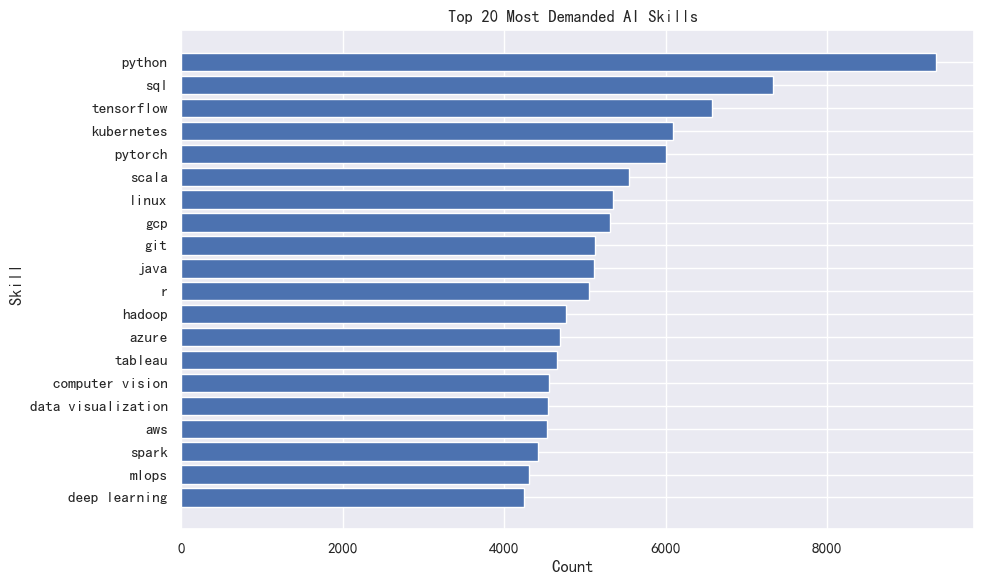

In [25]:
# 5. Top Skills Statistics 
all_skills = [skill for sub in df["skills_list"] for skill in sub]
skill_counts = Counter(all_skills)
top20_skills = pd.DataFrame(skill_counts.most_common(20),columns=["skill", "count"])

plt.figure(figsize = (10,6))
plt.barh(top20_skills["skill"][::-1], top20_skills["count"][::-1])
plt.title("Top 20 Most Demanded AI Skills ")
plt.xlabel("Count ")
plt.ylabel("Skill ")
plt.tight_layout()

plt.savefig("../outputs/top20_skills.png", dpi=200, bbox_inches="tight")
print(" Exported: ../outputs/top20_skills.png")
plt.show()


## 6. Tools Preferred Statistics & Visualization  

We analyze the preferred tools listed in job descriptions to understand tool requirements in the AI job market.


In [26]:
# # 6. Tools Preferred Statistics 
# def parse_tools(text):
#     if pd.isna(text): 
#         return []
#     return [t.strip().lower() for t in re.split(',|;|/|\\|', str(text)) if t.strip()]
# df["tools_list"] = df["tools_preferred"].apply(parse_tools)
# df["num_tools"] = df["tools_list"].apply(len)
# tool_counts = Counter([t for lst in df["tools_list"] for t in lst])
# top20_tools = pd.DataFrame(tool_counts.most_common(20), columns=["tool","count"])

# plt.figure(figsize=(10,6))
# plt.barh(top20_tools["tool"][::-1], top20_tools["count"][::-1])
# plt.title("Top 20 Preferred Tools")
# plt.xlabel("Count")
# plt.ylabel("Tools")
# plt.tight_layout()

# plt.savefig("../outputs/top20_tools.png", dpi=200, bbox_inches="tight")
# print(" Exported: ../outputs/top20_tools.png")
# plt.show()


####  Skill & Tool Normalization 


We unify different spellings and aliases of skills/tools to improve counting accuracy and feature quality.


In [27]:
# # === Skill normalization (example aliases) ===
# skill_alias = {
#     "tf": "tensorflow",
#     "tf2": "tensorflow",
#     "torch": "pytorch",
#     "ml": "machine learning",
#     "ai": "artificial intelligence",
#     "nlp engineer": "nlp",
# }

# # === Tool normalization (example aliases) ===
# # tool_alias = {
# #     "google cloud": "gcp",
# #     "gcloud": "gcp",
# #     "gcp cloud": "gcp",
# #     "microsoft azure": "azure",
# #     "ms azure": "azure",
# #     "powerbi": "power bi",
# #     "excel": "excel",  
# # }
# def normalize_list(lst, alias_dict):
#     return [alias_dict.get(x, x) for x in lst]

# df["skills_list"] = df["skills_list"].apply(lambda x: normalize_list(x, skill_alias))
# # df["tools_list"] = df["tools_list"].apply(lambda x: normalize_list(x, tool_alias))

# df[["skills_list"]].head()
# #### Skill Normalization 

# We unify different spellings and aliases of skills to improve counting accuracy

skill_alias = {
    # Deep Learning Frameworks
    "tf": "tensorflow",
    "tf2": "tensorflow",
    "torch": "pytorch",
    "keras": "keras",
    
    # Machine Learning
    "ml": "machine learning",
    "scikit-learn": "sklearn",
    "scikit learn": "sklearn",
    "sci-kit learn": "sklearn",
    
    # AI & NLP
    "ai": "artificial intelligence",
    "nlp": "natural language processing",
    "nlp engineer": "natural language processing",
    "computer vision": "cv",
    
    # Programming Languages
    "python3": "python",
    "py": "python",
    "js": "javascript",
    "ts": "typescript",
    
    # Databases
    "postgres": "postgresql",
    "mysql": "mysql",
    "mongodb": "mongodb",
    "nosql": "nosql",
    
    # Cloud Platforms
    "aws": "amazon web services",
    "amazon web services": "aws",
    "gcp": "google cloud platform",
    "google cloud": "google cloud platform",
    "azure": "microsoft azure",
    "ms azure": "microsoft azure",
    
    # Big Data & Tools
    "pyspark": "spark",
    "apache spark": "spark",
    "hadoop": "hadoop",
    
    # DevOps & Tools
    "k8s": "kubernetes",
    "docker": "docker",
    "ci/cd": "cicd",
    "git": "git",
    
    # Data Visualization
    "powerbi": "power bi",
    "tableau": "tableau",
    "matplotlib": "matplotlib",
    
    # Other Tools
    "jupyter": "jupyter notebook",
    "excel": "excel",
    "r programming": "r",
}

def normalize_list(lst, alias_dict):
    """标准化技能列表中的别名"""
    return [alias_dict.get(x, x) for x in lst]

# 只标准化 skills_list (移除 tools_list 相关代码)
df["skills_list"] = df["skills_list"].apply(lambda x: normalize_list(x, skill_alias))

print("✓ Skill normalization completed")
print(f"  - Unique skills after normalization: {len(set([s for lst in df['skills_list'] for s in lst]))}")

df[["skills_list"]].head()


✓ Skill normalization completed
  - Unique skills after normalization: 38


,skills_list
0,"[numpy, reinforcement learning, pytorch, sklea..."
1,"[sklearn, cuda, sql, pandas]"
2,"[mlflow, fastapi, microsoft azure, pytorch, sq..."
3,"[sklearn, c++, pandas, langchain, amazon web s..."
4,"[excel, keras, sql, hugging face]"


## 7. Skill Demand by Job Title 

We compare skill demand across top job titles using a heatmap.


✓ Skills parsing verification:
  - Total jobs: 32000
  - Jobs with skills: 32000
  - Sample skills: ['numpy', 'reinforcement learning', 'pytorch']

✓ Top 6 Job Titles:
  - Data Scientist: 6216 jobs
  - ML Engineer: 3350 jobs
  - NLP Engineer: 1768 jobs
  - AI Product Manager: 1765 jobs
  - Data Analyst: 1764 jobs
  - Computer Vision Engineer: 1734 jobs

✓ Filtered data: 16597 jobs
✓ After explode: 67060 skill records

✓ Total unique skills found: 38
✓ Top 25 Skills:
   1. python                         -  4814 occurrences
   2. sql                            -  3781 occurrences
   3. tensorflow                     -  3395 occurrences
   4. pytorch                        -  3114 occurrences
   5. kubernetes                     -  3054 occurrences
   6. scala                          -  2787 occurrences
   7. google cloud platform          -  2763 occurrences
   8. linux                          -  2681 occurrences
   9. r                              -  2648 occurrences
  10. java      

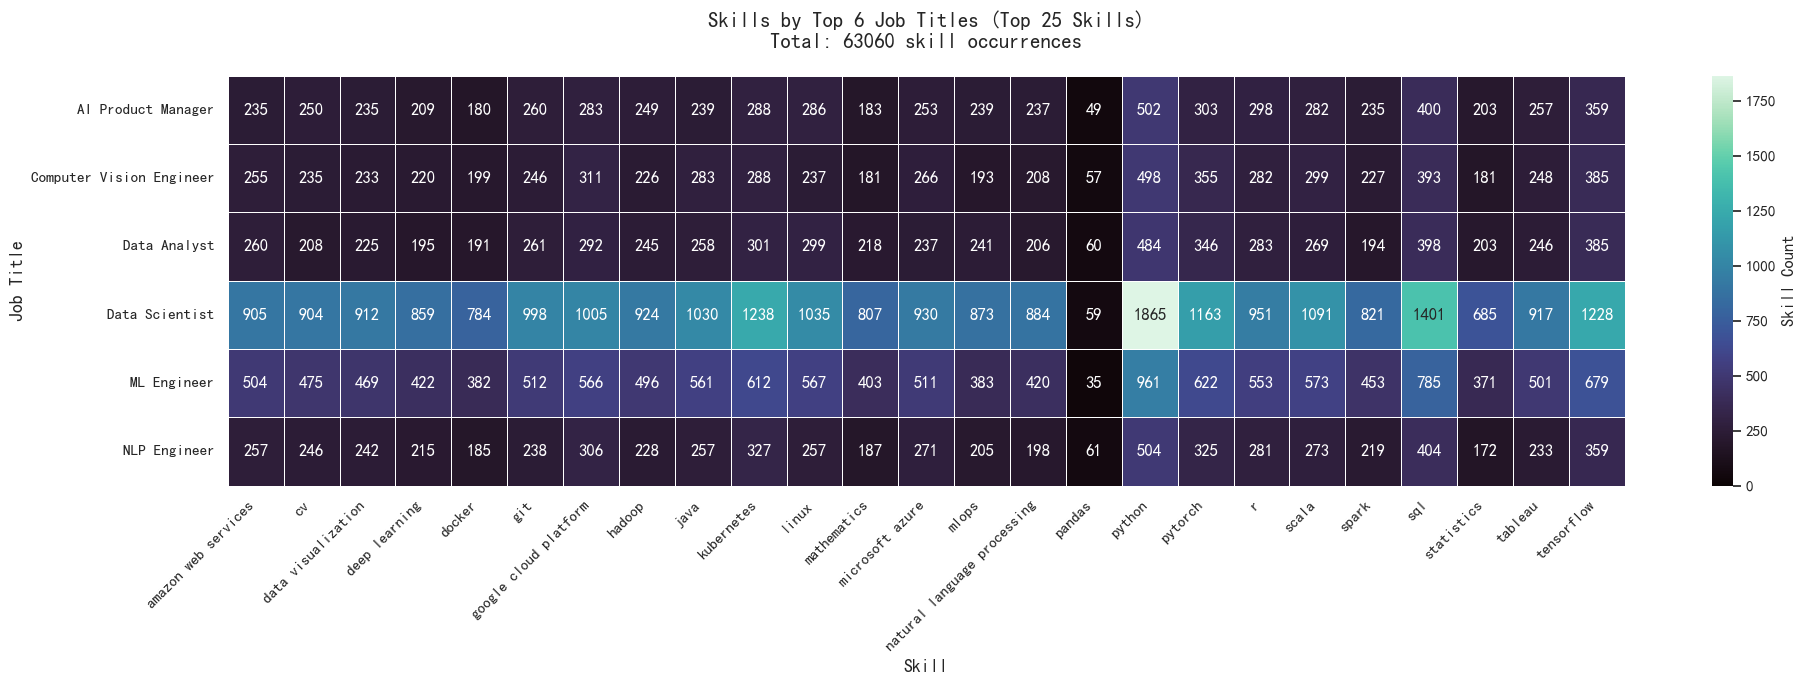

In [31]:
# # 7. Skill Demand by Job Title
# top_roles = df["job_title"].value_counts().head(6).index
# # Count skill occurrences for the selected roles
# role_skill = df[df["job_title"].isin(top_roles)].explode("skills_list")
# frequent_skills = Counter([s for lst in df["skills_list"] for s in lst]).most_common(15)
# top_skills_for_heat = [s for s, _ in frequent_skills]
# role_skill = role_skill[role_skill["skills_list"].isin(top_skills_for_heat)]
# # Create crosstab matrix
# role_skill_mat = pd.crosstab(role_skill["job_title"], role_skill["skills_list"])

# # Plot heatmap
# plt.figure(figsize=(14,6))
# sns.heatmap(role_skill_mat, cmap="mako", linewidths=.5, annot=False)
# plt.title("Skills by Top Job Titles ")
# plt.xlabel("Skill")
# plt.ylabel("Job Title")
# plt.tight_layout()

# plt.savefig("../outputs/skills_heatmap_by_role.png", dpi=200, bbox_inches="tight")
# print(" Exported: ../outputs/skills_heatmap_by_role.png")
# plt.show()
# 7. Skill Demand by Job Title - 修复版
import ast
from collections import Counter

# === 1. 确保技能列表正确解析 ===
def ensure_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    try:
        # 尝试解析字符串列表
        parsed = ast.literal_eval(x)
        return [s.strip().lower() for s in parsed] if isinstance(parsed, list) else []
    except:
        # 如果失败,尝试按逗号分割
        return [s.strip().lower() for s in str(x).split(',') if s.strip()]

df["skills_list"] = df["skills_list"].apply(ensure_list)

# 验证解析结果
print(f"✓ Skills parsing verification:")
print(f"  - Total jobs: {len(df)}")
print(f"  - Jobs with skills: {(df['skills_list'].apply(len) > 0).sum()}")
print(f"  - Sample skills: {df['skills_list'].iloc[0][:3]}")

# === 2. 选择 Top 6 职位 ===
top_roles = df["job_title"].value_counts().head(6).index
print(f"\n✓ Top 6 Job Titles:")
for role in top_roles:
    count = (df["job_title"] == role).sum()
    print(f"  - {role}: {count} jobs")

# === 3. 筛选这些职位的数据 ===
role_data = df[df["job_title"].isin(top_roles)].copy()
print(f"\n✓ Filtered data: {len(role_data)} jobs")

# === 4. 展开技能列表 ===
role_skill = role_data.explode("skills_list")
# 移除空值和空字符串
role_skill = role_skill[role_skill["skills_list"].notna() & (role_skill["skills_list"] != "")]
print(f"✓ After explode: {len(role_skill)} skill records")

# === 5. 统计这些职位的 Top 25 技能 ===
role_skill_counts = Counter(role_skill["skills_list"])
print(f"\n✓ Total unique skills found: {len(role_skill_counts)}")

top_skills_for_heat = [s for s, _ in role_skill_counts.most_common(25)]
print(f"✓ Top 25 Skills:")
for i, (skill, count) in enumerate(role_skill_counts.most_common(25), 1):
    print(f"  {i:2d}. {skill:30s} - {count:5d} occurrences")

# === 6. 过滤只保留 Top 25 技能 ===
role_skill_filtered = role_skill[role_skill["skills_list"].isin(top_skills_for_heat)]
print(f"\n✓ After filtering to Top 25: {len(role_skill_filtered)} records")

# === 7. 创建交叉表 ===
role_skill_mat = pd.crosstab(
    role_skill_filtered["job_title"], 
    role_skill_filtered["skills_list"]
)

# 移除全为0的列
role_skill_mat = role_skill_mat.loc[:, role_skill_mat.sum() > 0]

# === 8. 打印统计信息 ===
print(f"\n✓ Crosstab Matrix Statistics:")
print(f"  - Matrix shape: {role_skill_mat.shape}")
print(f"  - Total count: {role_skill_mat.sum().sum()}")
print(f"  - Non-zero cells: {(role_skill_mat > 0).sum().sum()}")
print(f"  - Average per cell: {role_skill_mat.mean().mean():.2f}")

# === 9. 绘制热力图 ===
plt.figure(figsize=(20, 7))
sns.heatmap(
    role_skill_mat, 
    cmap="mako", 
    linewidths=0.5, 
    annot=True,  # 显示数值
    fmt='d',     # 整数格式
    cbar_kws={'label': 'Skill Count'},
    vmin=0       # 从0开始
)
plt.title(
    f"Skills by Top 6 Job Titles (Top 25 Skills)\nTotal: {role_skill_mat.sum().sum()} skill occurrences", 
    fontsize=15, 
    fontweight='bold',
    pad=20
)
plt.xlabel("Skill", fontsize=13)
plt.ylabel("Job Title", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("../outputs/skills_heatmap_by_role.png", dpi=200, bbox_inches="tight")
print("\n✓ Exported: ../outputs/skills_heatmap_by_role.png")
plt.show()

## 8. Skill Demand by Industry

We analyze how different industries emphasize different skill sets.



✓ Top 6 Industries:
  - Automotive: 2335 jobs
  - Retail: 2334 jobs
  - Tech: 2296 jobs
  - Finance: 2281 jobs
  - Healthcare: 2250 jobs
  - Education: 2242 jobs

✓ Filtered data:
  - Total skill records: 51179
  - Matrix shape: (6, 25)
  - Total count: 51179

✓ Exported: ../outputs/skills_heatmap_by_industry.png


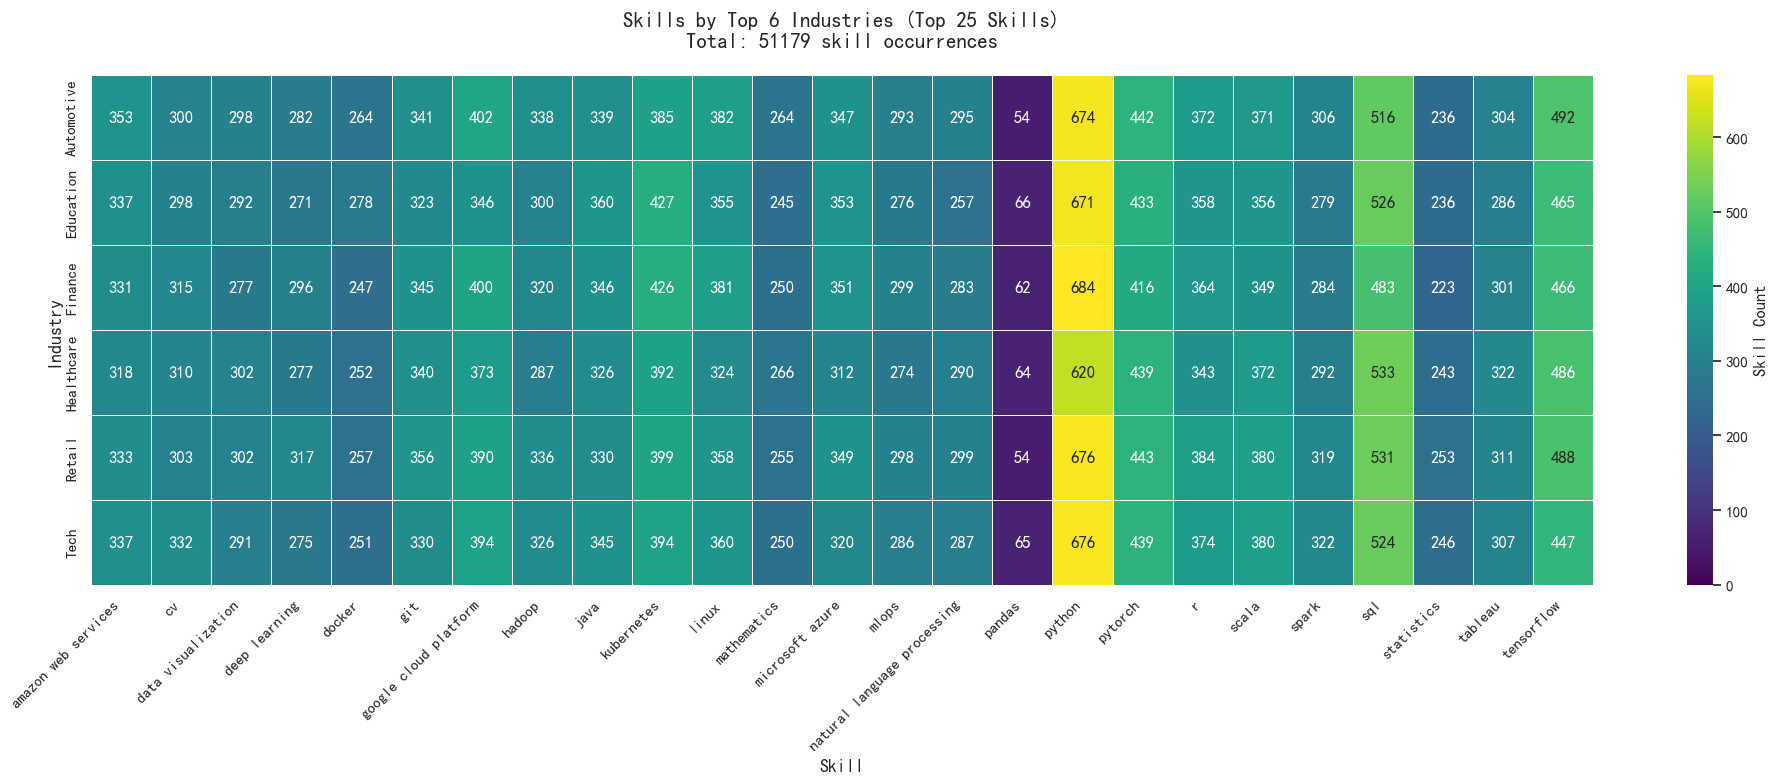

In [33]:
# # 8. Skill Demand by Industry
# top_inds = df["industry"].value_counts().head(6).index
# ind_skill = df[df["industry"].isin(top_inds)].explode("skills_list")
# ind_skill = ind_skill[ind_skill["skills_list"].isin(top_skills_for_heat)]
# ind_skill_mat = pd.crosstab(ind_skill["industry"], ind_skill["skills_list"])

# plt.figure(figsize=(14,8))
# sns.heatmap(ind_skill_mat, cmap="viridis", linewidths=.5)
# plt.title("Skills by Top Industries")
# plt.xlabel("Skill"); plt.ylabel("Industry")
# plt.tight_layout()

# plt.savefig("../outputs/skills_heatmap_by_industry.png", dpi=200, bbox_inches="tight")
# print(" Exported: ../outputs/skills_heatmap_by_industry.png")
# plt.show()
# 8. Skill Demand by Industry
top_inds = df["industry"].value_counts().head(6).index

print(f"✓ Top 6 Industries:")
for ind in top_inds:
    count = (df["industry"] == ind).sum()
    print(f"  - {ind}: {count} jobs")

# 展开技能列表
ind_skill = df[df["industry"].isin(top_inds)].explode("skills_list")

# 移除空值
ind_skill = ind_skill[
    ind_skill["skills_list"].notna() & (ind_skill["skills_list"] != "")
]

# 过滤只保留第7节统计的 Top 25 技能
ind_skill = ind_skill[ind_skill["skills_list"].isin(top_skills_for_heat)]

print(f"\n✓ Filtered data:")
print(f"  - Total skill records: {len(ind_skill)}")

# 创建交叉表
ind_skill_mat = pd.crosstab(ind_skill["industry"], ind_skill["skills_list"])

# 移除全为0的列
ind_skill_mat = ind_skill_mat.loc[:, ind_skill_mat.sum() > 0]

print(f"  - Matrix shape: {ind_skill_mat.shape}")
print(f"  - Total count: {ind_skill_mat.sum().sum()}")

# 绘制热力图
plt.figure(figsize=(20, 8))
sns.heatmap(
    ind_skill_mat,
    cmap="viridis",
    linewidths=0.5,
    annot=True,  # 显示数值
    fmt="d",  # 整数格式
    cbar_kws={"label": "Skill Count"},
    vmin=0,  # 从0开始
)
plt.title(
    f"Skills by Top 6 Industries (Top 25 Skills)\nTotal: {ind_skill_mat.sum().sum()} skill occurrences",
    fontsize=15,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Skill", fontsize=13)
plt.ylabel("Industry", fontsize=13)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("../outputs/skills_heatmap_by_industry.png", dpi=200, bbox_inches="tight")
print("\n✓ Exported: ../outputs/skills_heatmap_by_industry.png")
plt.show()

## 9. Technical vs Non-Technical Skills
We compare the proportion of technical skills against non-technical skills across job roles.


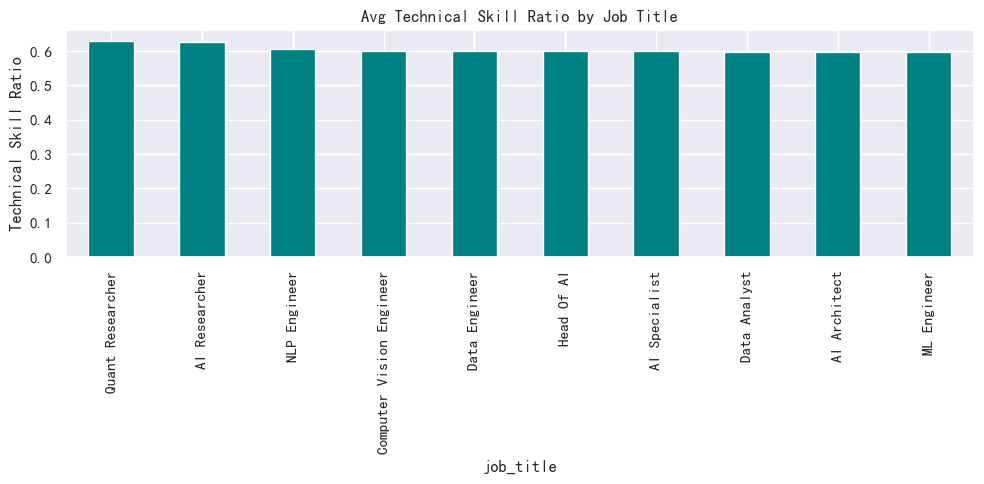

In [34]:
# 9. Technical vs Non-Technical Skills

# Define technical keywords (can be expanded)
technical_keywords = {
    "python","sql","pandas","numpy","scikit-learn",
    "tensorflow","pytorch","keras",
    "mlflow","spark","airflow","aws","azure","gcp",
    "docker","kubernetes","git","linux","c++","java",
    "tableau","power bi","nlp","cv","deep learning",
    "reinforcement learning","fastapi","flask","hugging face"
}

# Define some soft skills (small set for demo)
nontech_keywords = {
    "communication","leadership","presentation",
    "collaboration","problem solving","project management",
    "business"
}


def classify_skills(skills):
    tech = sum(1 for s in skills if s in technical_keywords)
    nontech = sum(1 for s in skills if s in nontech_keywords)
    return pd.Series({"tech_cnt": tech, "nontech_cnt": nontech})

skill_types = df["skills_list"].apply(classify_skills)
df = pd.concat([df, skill_types], axis=1)
df["tech_ratio"] = df["tech_cnt"] / df["num_skills"].replace(0, np.nan)
role_tech_ratio = df.groupby("job_title")["tech_ratio"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
role_tech_ratio.plot(kind="bar", color="teal")
plt.title("Avg Technical Skill Ratio by Job Title")
plt.ylabel("Technical Skill Ratio")
plt.tight_layout()
plt.show()


## 10. Skill–Salary / Experience Relationship Analysis

We explore how the number of required skills and experience level influence salary levels.

 Exported: ../outputs/salary_vs_skills.png


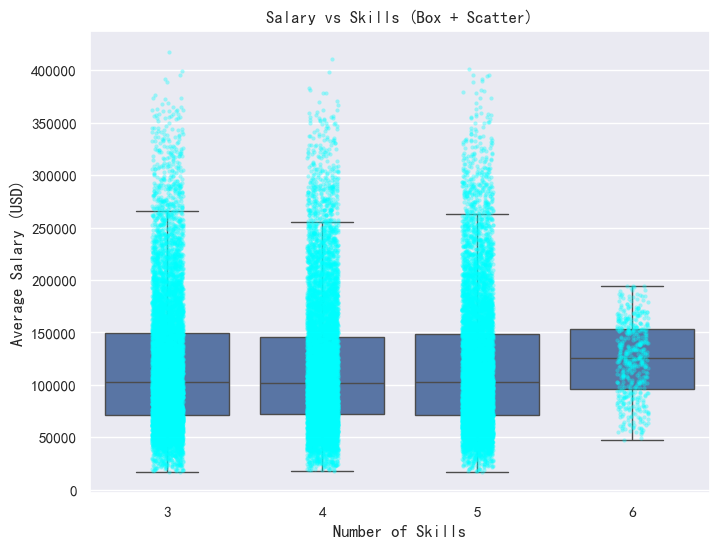

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x="num_skills", y="salary_avg", data=df, showfliers=False)
sns.stripplot(x="num_skills", y="salary_avg", data=df, 
              color="cyan", size=3, alpha=0.35, jitter=True)
plt.title("Salary vs Skills (Box + Scatter)")
plt.xlabel("Number of Skills")
plt.ylabel("Average Salary (USD)")

plt.savefig("../outputs/salary_vs_skills.png", dpi=200, bbox_inches="tight")
print(" Exported: ../outputs/salary_vs_skills.png")
plt.show()


###  Insight 

- Jobs requiring more skills tend to offer higher salary levels.
- Although the trend is not extremely strong, there is a noticeable positive correlation between skill count and compensation.
- Salary variation also increases as the number of skills grows, suggesting broader opportunities at senior skill levels.

## 11. Feature Engineering for Clustering 

We convert skills, salary, and category attributes into numeric features suitable for clustering.



In [37]:
# # 11. Feature Engineering for Clustering
# from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler

# num_cols = ["salary_avg", "num_skills"]
# num_df = df[num_cols].copy()

# # Fill NA with median
# for col in num_cols:
#     num_df[col] = num_df[col].fillna(num_df[col].median())

# # Standardize
# scaler = StandardScaler()
# num_scaled = scaler.fit_transform(num_df)
# num_scaled_df = pd.DataFrame(num_scaled, columns=[f"{c}_scaled" for c in num_cols])

# # Categorical Features
# cat_cols = ["job_title", "industry", "employment_type"]
# cat_df = df[cat_cols].fillna("unknown")

# ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
# ohe_vals = ohe.fit_transform(cat_df)
# ohe_cols = ohe.get_feature_names_out(cat_cols)
# ohe_df = pd.DataFrame(ohe_vals, columns=ohe_cols)

# #Skills Features
# from collections import Counter
# skill_counts = Counter([s for skills in df["skills_list"] for s in skills])
# TOP_N = 30
# top_skills = [s for s, _ in skill_counts.most_common(TOP_N)]


# filtered_skills = df["skills_list"].apply(
#     lambda skills: [s for s in skills if s in top_skills]
# )

# mlb = MultiLabelBinarizer(classes=top_skills)
# skills_hot = mlb.fit_transform(filtered_skills)
# skills_df = pd.DataFrame(skills_hot, columns=[f"skill_{s}" for s in top_skills])

# features_df = pd.concat([num_scaled_df, ohe_df, skills_df], axis=1)

# features_df.head()
# 11. Feature Engineering for Clustering
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler
from collections import Counter

print("=" * 60)
print("Starting Feature Engineering for Clustering")
print("=" * 60)

# === 1. 数值特征处理 ===
print("\n1️⃣ Processing Numerical Features...")
num_cols = ["salary_avg", "num_skills"]
num_df = df[num_cols].copy()

# Fill NA with median
for col in num_cols:
    median_val = num_df[col].median()
    num_df[col] = num_df[col].fillna(median_val)
    print(
        f"   - {col}: filled {df[col].isna().sum()} missing values with {median_val:.2f}"
    )

# Standardize
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)
num_scaled_df = pd.DataFrame(num_scaled, columns=[f"{c}_scaled" for c in num_cols])

print(f"   ✓ Numerical features scaled: {num_scaled_df.shape}")
print(f"     Mean: {num_scaled_df.mean().values}")
print(f"     Std:  {num_scaled_df.std().values}")

# === 2. 分类特征处理 ===
print("\n2️⃣ Processing Categorical Features...")
cat_cols = ["job_title", "industry", "employment_type"]
cat_df = df[cat_cols].fillna("unknown")

print(f"   - Job titles: {cat_df['job_title'].nunique()}")
print(f"   - Industries: {cat_df['industry'].nunique()}")
print(f"   - Employment types: {cat_df['employment_type'].nunique()}")

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_vals = ohe.fit_transform(cat_df)
ohe_cols = ohe.get_feature_names_out(cat_cols)
ohe_df = pd.DataFrame(ohe_vals, columns=ohe_cols)

print(f"   ✓ Categorical features one-hot encoded: {ohe_df.shape}")

# === 3. 技能特征处理 ===
print("\n3️⃣ Processing Skills Features...")

# 确保 skills_list 是列表格式(在第7节已处理,但再次确认)
df["skills_list"] = df["skills_list"].apply(lambda x: x if isinstance(x, list) else [])

# 统计所有技能频率
all_skills_flat = [s for skills in df["skills_list"] for s in skills]
skill_counts = Counter(all_skills_flat)

print(f"   - Total unique skills: {len(skill_counts)}")
print(f"   - Total skill mentions: {len(all_skills_flat)}")

# 选择 Top 30 技能
TOP_N = 30
top_skills = [s for s, _ in skill_counts.most_common(TOP_N)]

print(f"\n   Top {TOP_N} Skills:")
for i, (skill, count) in enumerate(skill_counts.most_common(TOP_N), 1):
    print(f"     {i:2d}. {skill:25s} - {count:5d} occurrences")

# 过滤每个职位的技能,只保留 Top 30
filtered_skills = df["skills_list"].apply(
    lambda skills: [s for s in skills if s in top_skills]
)

print(
    f"\n   - Average skills per job (before filtering): {df['skills_list'].apply(len).mean():.2f}"
)
print(
    f"   - Average skills per job (after filtering):  {filtered_skills.apply(len).mean():.2f}"
)

# 多标签二值化
mlb = MultiLabelBinarizer(classes=top_skills)
skills_hot = mlb.fit_transform(filtered_skills)
skills_df = pd.DataFrame(skills_hot, columns=[f"skill_{s}" for s in top_skills])

print(f"   ✓ Skills features binarized: {skills_df.shape}")
print(f"     Sparsity: {(skills_df == 0).sum().sum() / skills_df.size * 100:.2f}%")

# === 4. 合并所有特征 ===
print("\n4️⃣ Combining All Features...")
features_df = pd.concat([num_scaled_df, ohe_df, skills_df], axis=1)

print(f"   ✓ Final feature matrix shape: {features_df.shape}")
print(f"     - Numerical features:    {len(num_scaled_df.columns)}")
print(f"     - Categorical features:  {len(ohe_df.columns)}")
print(f"     - Skill features:        {len(skills_df.columns)}")
print(f"     - Total features:        {len(features_df.columns)}")

# === 5. 数据质量检查 ===
print("\n5️⃣ Data Quality Check...")
print(f"   - Missing values: {features_df.isna().sum().sum()}")
print(f"   - Infinite values: {np.isinf(features_df).sum().sum()}")
print(f"   - Data types: {features_df.dtypes.value_counts().to_dict()}")

# 显示前几行
print("\n📊 Feature Matrix Preview:")
features_df.head()

Starting Feature Engineering for Clustering

1️⃣ Processing Numerical Features...
   - salary_avg: filled 0 missing values with 102918.50
   - num_skills: filled 0 missing values with 4.00
   ✓ Numerical features scaled: (32000, 2)
     Mean: [2.27040609e-17 3.38395978e-16]
     Std:  [1.00001563 1.00001563]

2️⃣ Processing Categorical Features...
   - Job titles: 18
   - Industries: 16
   - Employment types: 6
   ✓ Categorical features one-hot encoded: (32000, 40)

3️⃣ Processing Skills Features...
   - Total unique skills: 38
   - Total skill mentions: 128760

   Top 30 Skills:
      1. python                    -  9351 occurrences
      2. sql                       -  7326 occurrences
      3. tensorflow                -  6570 occurrences
      4. kubernetes                -  6087 occurrences
      5. pytorch                   -  6009 occurrences
      6. scala                     -  5542 occurrences
      7. linux                     -  5347 occurrences
      8. google cloud platfo

,salary_avg_scaled,num_skills_scaled,job_title_AI Architect,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Researcher,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,job_title_Computer Vision Engineer,...,skill_natural language processing,skill_mathematics,skill_docker,skill_statistics,skill_excel,skill_pandas,skill_fastapi,skill_numpy,skill_reinforcement learning,skill_hugging face
0,-0.257918,2.336450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,1,0
1,-0.083735,-0.028079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,0.900325,2.336450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,-0.489222,2.336450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.005345,-0.028079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
features_df.to_csv("../dataset/cluster_features.csv", index=False)
print(" cluster_features.csv has been saved.")

 cluster_features.csv has been saved.


##  Summary 

We have successfully completed responsibilities ,
including in-depth skill analysis and construction of a clustering-ready feature matrix.


###  Key Work 

 Skill & tool normalization (semantic unification)  

 Popular skills & tools statistics and visualization  

 Role-/Industry-based skill difference analysis (heatmaps)  

 Technical vs Non-Technical skill ratio analysis  

 Salary correlations with skills

 One-Hot encoding for categorical fields  

 Standardization of key numerical features  

 Final clustering feature dataset exported for Member 3  

---

###  Output Files Delivered 

| File | Description |
|---|---|
| `cluster_features.csv` |  Features for clustering  |
| `top20_skills.csv` / `top20_tools.csv` | Top skill & tool frequency |
| `skills_heatmap_by_role.png` | Skill preference by job role |
| `skills_heatmap_by_industry.png` | Skill preference by industry |
| Other charts (salary trends, distributions...) | |

---
